In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import one_hot, text_to_word_sequence
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

### Decoding reviews to English

In [5]:
word_index = imdb.get_word_index()

# Reverses it, mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# Decodes the review
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Encoding the integer sentences into a binary matrix

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Creates a matrix of zeroes
    
    # Sets specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)  # Vectorized training data
x_test = vectorize_sequences(test_data)  # Vectorized test data

y_train = np.asarray(train_labels).astype('float32')  # Vectorized training labels
y_test = np.asarray(test_labels).astype('float32')  # Vectorized test labels

In [9]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


### The model definition

In [10]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Validate model

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Train the model

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.5084 - acc: 0.7811 - val_loss: 0.3797 - val_acc: 0.8683
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.3004 - acc: 0.9045 - val_loss: 0.3004 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2179 - acc: 0.9284 - val_loss: 0.3086 - val_acc: 0.8709
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1751 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8871
Epoch 6/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1150 - acc: 0.9649 - val_loss: 0.3162 - val_acc: 0.8770
Epoch 7/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3126 - 

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])

### Ploting the training and validation loss

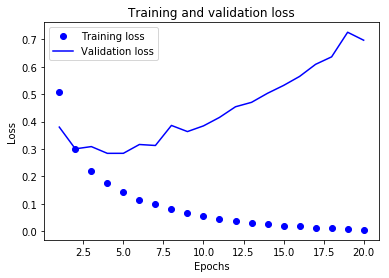

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy

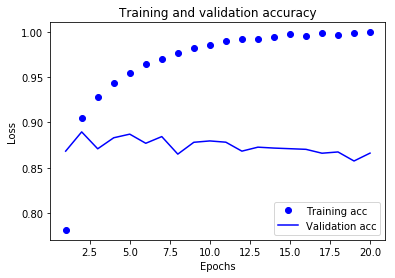

In [15]:
plt.clf()  # Clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Retraining a model from scratch

In [32]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.5379 - acc: 0.7775 - val_loss: 0.4060 - val_acc: 0.8681
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3156 - acc: 0.9008 - val_loss: 0.3202 - val_acc: 0.8787
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2301 - acc: 0.9269 - val_loss: 0.2804 - val_acc: 0.8909
Epoch 4/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1808 - acc: 0.9429 - val_loss: 0.2739 - val_acc: 0.8901
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1465 - acc: 0.9558 - val_loss: 0.2863 - val_acc: 0.8852
Epoch 6/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1227 - acc: 0.9637 - val_loss: 0.3056 - val_acc: 0.8796
Epoch 7/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1036 - acc: 0.9701 - val_loss: 0.3148 - 

ValueError: Input arrays should have the same number of samples as target arrays. Found 1 input samples and 25000 target samples.

In [33]:
print(results)

[0.30139381105422974, 0.87728]


In [34]:
x_test

array([[0., 0., 1., ..., 0., 0., 0.]])

### Generating predictions on new data

In [35]:
prediction = model.predict(x_test)
print(len(prediction[0]))
print(prediction)

1
[[0.85004586]]


## Using the model with real data

### Preprocessing the text with one_hot_encoding technique

In [36]:
text = 'I sincerely tried to get into this movie. I was honestly bored throughout the film. I loved the camera work and get what this was going for. I just could not get invested as much as I wanted to. Not a bad movie. Just not keeping me tuned in. Although I do say again Cinematography was very nice throughout the film.'
sequences = []
vocabulary = set(text_to_word_sequence(text))
vocabulary_size = len(vocabulary)
print(vocabulary_size)
encoded_text = one_hot(text, vocabulary_size)
sequences.append(encoded_text)
print(sequences)



41
[[3, 18, 9, 5, 3, 39, 2, 33, 3, 28, 17, 5, 17, 8, 8, 3, 28, 8, 18, 1, 28, 3, 2, 2, 28, 27, 10, 3, 6, 6, 4, 3, 8, 2, 30, 2, 3, 26, 5, 4, 2, 24, 33, 6, 4, 29, 23, 19, 9, 7, 3, 28, 25, 7, 2, 28, 7, 4, 17, 8, 8]]


### Vectorize sequences

In [37]:
x_test = vectorize_sequences(sequences)
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]]


In [38]:
pred = model.predict(x_test)
print(pred[0])

[0.52818966]


In [47]:
# text = 'I sincerely tried to get into this movie. I was honestly bored throughout the film. I loved the camera work and get what this was going for. I just could not get invested as much as I wanted to. Not a bad movie. Just not keeping me tuned in. Although I do say again Cinematography was very nice throughout the film.'
text = "This movie was the best written, acted, visual effected, etc. movie. This movie was the best movie I have ever seen. I am a huge Christopher Nolan fan and this movie was his finest. Matthew McConaughey turned in his best performance of his lifetime. Anne Hathaway was an amazing supporting actress and compared to her performance in Les Miserables, I have no idea how she didn't get an Oscar for this. The visual effects were more than just Oscar worthy. They were pioneering. I have never seen anything like it. One thing I would recommend is having a little previous knowledge about space. Not like Einstein stuff though. I would recommend you see this movie as fast as you can if you are a Nolan fan or not. I give this movie a rating of 97 out of 100."
text = """"""
sequences = []
vocabulary = set(text_to_word_sequence(text))
vocabulary_size = len(vocabulary)
print(vocabulary_size)
encoded_text = one_hot(text, vocabulary_size)
sequences.append(encoded_text)
print(sequences)
x_test = vectorize_sequences(sequences)
print(x_test)

0
[[]]
[[0. 0. 0. ... 0. 0. 0.]]


In [48]:
pred = model.predict(x_test)
print(pred[0])

[0.5473244]
